In [2]:
import torch
import torch.nn as nn
from torchdiffeq import odeint

class ODEFunc(nn.Module):
    def __init__(self):
        super(ODEFunc, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, 50),
            nn.Tanh(),
            nn.Linear(50, dim)
        )

    def forward(self, t, y):
        return self.net(y)

# Setup for the ODE
dim = 2  # Dimension of the latent space

# Initialize the ODE function
ode_func = ODEFunc()

# Base distribution from which we sample initial conditions
base_dist = torch.distributions.Normal(torch.zeros(dim), torch.ones(dim))

# Sample an initial condition
z0 = base_dist.sample()  # Initial latent variable

# Time tensor, specifying float data type to avoid the TypeError
t = torch.tensor([0, 1], dtype=torch.float32)

# Solving the ODE
zT = odeint(ode_func, z0, t)[-1]  # Evolved latent variable at time 1

# zT now represents a complex distribution transformed from the base distribution


In [9]:
zT.detach().numpy()[0]

0.31741259

ValueError: x and y must have same first dimension, but have shapes (2,) and (1,)

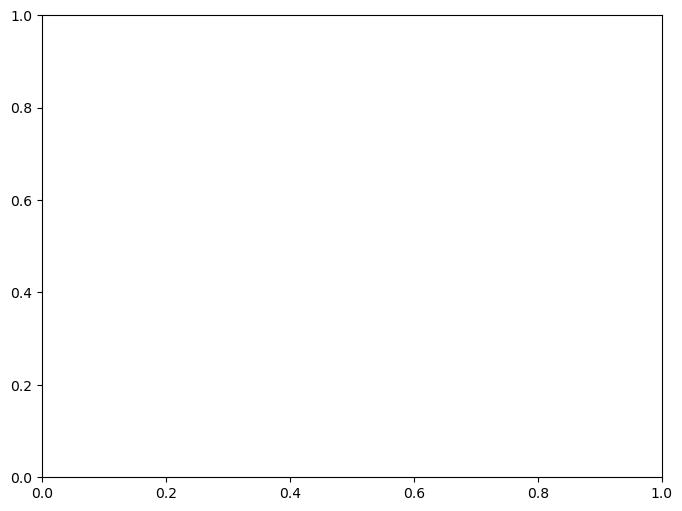

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(t.numpy(), zT.detach().numpy()[0], label='Component 1')
plt.plot(t.numpy(), zT.detach().numpy()[1], label='Component 2')
plt.scatter([t.numpy()[0], t.numpy()[-1]], [z0[0], zT.detach().numpy()[-1, 0]], color='red', zorder=5)
plt.scatter([t.numpy()[0], t.numpy()[-1]], [z0[1], zT.detach().numpy()[-1, 1]], color='blue', zorder=5)
plt.title('Trajectory of Latent Variables in ODE System')
plt.xlabel('Time')
plt.ylabel('Latent Variable Values')
plt.legend()
plt.grid(True)
plt.show()